In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
#get correlations of each features in dataset

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("Couples.csv")
df.shape

(1096, 15)

In [4]:
dummies_Sex = pd.get_dummies(df.Sex)

merged = pd.concat([df,dummies_Sex],axis='columns')

temp = merged.drop(['Sex', 'Donot Disclose'], axis='columns')
temp

,Person_Age,Person_Sexual_Orientation,Person_Ethinicity,Partners_Age_Difference,Partners_Distance,Partners_Hobby,Partners_Education,Partners_Tourist_Destination,Partners_Movie,Partners_Food,Partners_Drinks,Partners_Sexual_Orientation,Partners_Ethnicity,Compatibility,Female,Male,Transgender
0,18,Heterosexual,Non-hispanic whites,5,5,Cycling,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0
1,19,Heterosexual,Non-hispanic whites,5,10,Gardening,High School,Beaches,Science Fiction,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0
2,20,Heterosexual,Non-hispanic whites,10,15,fishing,Under Graduate,Mountains,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0
3,18,Heterosexual,Non-hispanic whites,5,5,Cycling,Post Graduate,Ranches,Romance,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,1,0,0
4,18,Heterosexual,Non-hispanic whites,5,15,Swimming,Graduate,Adventure,Horror,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,Heterosexual,Non-hispanic whites,10,10,Athletics,Post Graduate,Beaches,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Native Alakan,1,0,1,0
1092,17,Heterosexual,Non-hispanic whites,5,15,Athletics,Uneducated,Adventure,Horror,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,0,1,0,0
1093,22,Heterosexual,Non-hispanic whites,5,10,Athletics,Graduate,Heritage,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Partner_Hispanic and Latino,1,0,1,0
1094,23,Heterosexual,Non-hispanic whites,5,5,Swimming,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Native American,1,1,0,0


In [5]:
dummies_Person_Sexual_Orientation = pd.get_dummies(df.Person_Sexual_Orientation)

merged = pd.concat([temp,dummies_Person_Sexual_Orientation],axis='columns')

temp = merged.drop(['Person_Sexual_Orientation', 'Asexual'], axis='columns')
temp

,Person_Age,Person_Ethinicity,Partners_Age_Difference,Partners_Distance,Partners_Hobby,Partners_Education,Partners_Tourist_Destination,Partners_Movie,Partners_Food,Partners_Drinks,Partners_Sexual_Orientation,Partners_Ethnicity,Compatibility,Female,Male,Transgender,Bisexual,Heterosexual,Homosexual
0,18,Non-hispanic whites,5,5,Cycling,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,1,0
1,19,Non-hispanic whites,5,10,Gardening,High School,Beaches,Science Fiction,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,1,0
2,20,Non-hispanic whites,10,15,fishing,Under Graduate,Mountains,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,1,0
3,18,Non-hispanic whites,5,5,Cycling,Post Graduate,Ranches,Romance,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,1,0,0,0,1,0
4,18,Non-hispanic whites,5,15,Swimming,Graduate,Adventure,Horror,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,Non-hispanic whites,10,10,Athletics,Post Graduate,Beaches,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Native Alakan,1,0,1,0,0,1,0
1092,17,Non-hispanic whites,5,15,Athletics,Uneducated,Adventure,Horror,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,0,1,0,0,0,1,0
1093,22,Non-hispanic whites,5,10,Athletics,Graduate,Heritage,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Partner_Hispanic and Latino,1,0,1,0,0,1,0
1094,23,Non-hispanic whites,5,5,Swimming,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Native American,1,1,0,0,0,1,0


In [6]:
dummies_Person_Ethinicity = pd.get_dummies(df.Person_Ethinicity)

merged = pd.concat([temp,dummies_Person_Ethinicity],axis='columns')

temp = merged.drop(['Person_Ethinicity', 'Native Americans'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Hobby,Partners_Education,Partners_Tourist_Destination,Partners_Movie,Partners_Food,Partners_Drinks,Partners_Sexual_Orientation,...,Female,Male,Transgender,Bisexual,Heterosexual,Homosexual,African-Americans,Asian,Hispanic and Latino,Non-hispanic whites
0,18,5,5,Cycling,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,...,0,1,0,0,1,0,0,0,0,1
1,19,5,10,Gardening,High School,Beaches,Science Fiction,Non-vegetarian,Alcholic,Partner_Heterosexual,...,0,1,0,0,1,0,0,0,0,1
2,20,10,15,fishing,Under Graduate,Mountains,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,...,0,1,0,0,1,0,0,0,0,1
3,18,5,5,Cycling,Post Graduate,Ranches,Romance,Vegan,Alcholic,Partner_Heterosexual,...,1,0,0,0,1,0,0,0,0,1
4,18,5,15,Swimming,Graduate,Adventure,Horror,Non-vegetarian,Alcholic,Partner_Heterosexual,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Athletics,Post Graduate,Beaches,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,...,0,1,0,0,1,0,0,0,0,1
1092,17,5,15,Athletics,Uneducated,Adventure,Horror,Vegan,Alcholic,Partner_Heterosexual,...,1,0,0,0,1,0,0,0,0,1
1093,22,5,10,Athletics,Graduate,Heritage,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,...,0,1,0,0,1,0,0,0,0,1
1094,23,5,5,Swimming,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,...,1,0,0,0,1,0,0,0,0,1


In [7]:
dummies_Partners_Hobby = pd.get_dummies(df.Partners_Hobby)

merged = pd.concat([temp,dummies_Partners_Hobby],axis='columns')

temp = merged.drop(['Partners_Hobby', 'fishing'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Education,Partners_Tourist_Destination,Partners_Movie,Partners_Food,Partners_Drinks,Partners_Sexual_Orientation,Partners_Ethnicity,...,Asian,Hispanic and Latino,Non-hispanic whites,Athletics,Cooking,Cycling,Gardening,Reading,Swimming,cooking
0,18,5,5,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,...,0,0,1,0,0,1,0,0,0,0
1,19,5,10,High School,Beaches,Science Fiction,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,...,0,0,1,0,0,0,1,0,0,0
2,20,10,15,Under Graduate,Mountains,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,...,0,0,1,0,0,0,0,0,0,0
3,18,5,5,Post Graduate,Ranches,Romance,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,...,0,0,1,0,0,1,0,0,0,0
4,18,5,15,Graduate,Adventure,Horror,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Post Graduate,Beaches,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Native Alakan,...,0,0,1,1,0,0,0,0,0,0
1092,17,5,15,Uneducated,Adventure,Horror,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,...,0,0,1,1,0,0,0,0,0,0
1093,22,5,10,Graduate,Heritage,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Partner_Hispanic and Latino,...,0,0,1,1,0,0,0,0,0,0
1094,23,5,5,High School,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Native American,...,0,0,1,0,0,0,0,0,1,0


In [8]:
dummies_Partners_Education = pd.get_dummies(df.Partners_Education)

merged = pd.concat([temp,dummies_Partners_Education],axis='columns')

temp = merged.drop(['Partners_Education', 'Post Graduate'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Tourist_Destination,Partners_Movie,Partners_Food,Partners_Drinks,Partners_Sexual_Orientation,Partners_Ethnicity,Compatibility,...,Cooking,Cycling,Gardening,Reading,Swimming,cooking,Graduate,High School,Under Graduate,Uneducated
0,18,5,5,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,...,0,1,0,0,0,0,0,1,0,0
1,19,5,10,Beaches,Science Fiction,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,...,0,0,1,0,0,0,0,1,0,0
2,20,10,15,Mountains,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,...,0,0,0,0,0,0,0,0,1,0
3,18,5,5,Ranches,Romance,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,...,0,1,0,0,0,0,0,0,0,0
4,18,5,15,Adventure,Horror,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Beaches,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Native Alakan,1,...,0,0,0,0,0,0,0,0,0,0
1092,17,5,15,Adventure,Horror,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,0,...,0,0,0,0,0,0,0,0,0,1
1093,22,5,10,Heritage,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Partner_Hispanic and Latino,1,...,0,0,0,0,0,0,1,0,0,0
1094,23,5,5,Beaches,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Native American,1,...,0,0,0,0,1,0,0,1,0,0


In [9]:
dummies_Partners_Tourist_Destination = pd.get_dummies(df.Partners_Tourist_Destination)

merged = pd.concat([temp,dummies_Partners_Tourist_Destination],axis='columns')

temp = merged.drop(['Partners_Tourist_Destination', 'Adventure'], axis='columns')
temp

,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Movie,Partners_Food,Partners_Drinks,Partners_Sexual_Orientation,Partners_Ethnicity,Compatibility,Female,...,Swimming,cooking,Graduate,High School,Under Graduate,Uneducated,Beaches,Heritage,Mountains,Ranches
0,18,5,5,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,...,0,0,0,1,0,0,1,0,0,0
1,19,5,10,Science Fiction,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,...,0,0,0,1,0,0,1,0,0,0
2,20,10,15,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,...,0,0,0,0,1,0,0,0,1,0
3,18,5,5,Romance,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,1,...,0,0,0,0,0,0,0,0,0,1
4,18,5,15,Horror,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Native Alakan,1,0,...,0,0,0,0,0,0,1,0,0,0
1092,17,5,15,Horror,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,0,1,...,0,0,0,0,0,1,0,0,0,0
1093,22,5,10,Romance,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Partner_Hispanic and Latino,1,0,...,0,0,1,0,0,0,0,1,0,0
1094,23,5,5,Romance,Non-vegetarian,Alcholic,Partner_Heterosexual,Native American,1,1,...,1,0,0,1,0,0,1,0,0,0


In [10]:
dummies_Partners_Movie = pd.get_dummies(df.Partners_Movie)
dummies_Partners_Movie

merged = pd.concat([temp,dummies_Partners_Movie],axis='columns')
merged

temp = merged.drop(['Partners_Movie', 'Satire'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Food,Partners_Drinks,Partners_Sexual_Orientation,Partners_Ethnicity,Compatibility,Female,Male,...,Uneducated,Beaches,Heritage,Mountains,Ranches,Crime,Horror,Romance,Science Fiction,action
0,18,5,5,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1,19,5,10,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,...,0,1,0,0,0,0,0,0,1,0
2,20,10,15,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,...,0,0,0,1,0,0,0,1,0,0
3,18,5,5,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,18,5,15,Non-vegetarian,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Native Alakan,1,0,1,...,0,1,0,0,0,0,0,1,0,0
1092,17,5,15,Vegan,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1093,22,5,10,Non-vegetarian,Non Alcoholic,Partner_Heterosexual,Partner_Hispanic and Latino,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1094,23,5,5,Non-vegetarian,Alcholic,Partner_Heterosexual,Native American,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [11]:
dummies_Partners_Food = pd.get_dummies(df.Partners_Food)

merged = pd.concat([temp,dummies_Partners_Food],axis='columns')

temp = merged.drop(['Partners_Food', 'Vegan'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Drinks,Partners_Sexual_Orientation,Partners_Ethnicity,Compatibility,Female,Male,Transgender,...,Beaches,Heritage,Mountains,Ranches,Crime,Horror,Romance,Science Fiction,action,Non-vegetarian
0,18,5,5,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
1,19,5,10,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,20,10,15,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,18,5,5,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,18,5,15,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Non Alcoholic,Partner_Heterosexual,Native Alakan,1,0,1,0,...,1,0,0,0,0,0,1,0,0,1
1092,17,5,15,Alcholic,Partner_Heterosexual,Partner_Non-hispanic whites,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1093,22,5,10,Non Alcoholic,Partner_Heterosexual,Partner_Hispanic and Latino,1,0,1,0,...,0,1,0,0,0,0,1,0,0,1
1094,23,5,5,Alcholic,Partner_Heterosexual,Native American,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [12]:
dummies_Partners_Drinks = pd.get_dummies(df.Partners_Drinks)

merged = pd.concat([temp,dummies_Partners_Drinks],axis='columns')

temp = merged.drop(['Partners_Drinks', 'Non Alcoholic'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Sexual_Orientation,Partners_Ethnicity,Compatibility,Female,Male,Transgender,Bisexual,...,Heritage,Mountains,Ranches,Crime,Horror,Romance,Science Fiction,action,Non-vegetarian,Alcholic
0,18,5,5,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,19,5,10,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
2,20,10,15,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,1
3,18,5,5,Partner_Heterosexual,Partner_Non-hispanic whites,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,18,5,15,Partner_Heterosexual,Partner_Non-hispanic whites,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Partner_Heterosexual,Native Alakan,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1092,17,5,15,Partner_Heterosexual,Partner_Non-hispanic whites,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1093,22,5,10,Partner_Heterosexual,Partner_Hispanic and Latino,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1094,23,5,5,Partner_Heterosexual,Native American,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [13]:
dummies_Partners_Sexual_Orientation = pd.get_dummies(df.Partners_Sexual_Orientation)

merged = pd.concat([temp,dummies_Partners_Sexual_Orientation],axis='columns')

temp = merged.drop(['Partners_Sexual_Orientation', 'Asexual'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Partners_Ethnicity,Compatibility,Female,Male,Transgender,Bisexual,Heterosexual,...,Crime,Horror,Romance,Science Fiction,action,Non-vegetarian,Alcholic,Partner_Bisexual,Partner_Heterosexual,Partner_Homosexual
0,18,5,5,Partner_Non-hispanic whites,1,0,1,0,0,1,...,0,0,1,0,0,1,1,0,1,0
1,19,5,10,Partner_Non-hispanic whites,1,0,1,0,0,1,...,0,0,0,1,0,1,1,0,1,0
2,20,10,15,Partner_Non-hispanic whites,1,0,1,0,0,1,...,0,0,1,0,0,1,1,0,1,0
3,18,5,5,Partner_Non-hispanic whites,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
4,18,5,15,Partner_Non-hispanic whites,1,0,1,0,0,1,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,Native Alakan,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1092,17,5,15,Partner_Non-hispanic whites,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1093,22,5,10,Partner_Hispanic and Latino,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1094,23,5,5,Native American,1,1,0,0,0,1,...,0,0,1,0,0,1,1,0,1,0


In [14]:
dummies_Partners_Ethnicity = pd.get_dummies(df.Partners_Ethnicity)

merged = pd.concat([temp,dummies_Partners_Ethnicity],axis='columns')

temp = merged.drop(['Partners_Ethnicity', 'Native American'], axis='columns')
temp


,Person_Age,Partners_Age_Difference,Partners_Distance,Compatibility,Female,Male,Transgender,Bisexual,Heterosexual,Homosexual,...,Non-vegetarian,Alcholic,Partner_Bisexual,Partner_Heterosexual,Partner_Homosexual,Native Alakan,Partner_African-Americans,Partner_Asian,Partner_Hispanic and Latino,Partner_Non-hispanic whites
0,18,5,5,1,0,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
1,19,5,10,1,0,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
2,20,10,15,1,0,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
3,18,5,5,1,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,18,5,15,1,0,1,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,18,10,10,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1092,17,5,15,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1093,22,5,10,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1094,23,5,5,1,1,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,0


In [15]:
# iterating the columns 
listCol = []
for col in temp.columns: 
    print(col) 
    listCol.append(col)
print(len(listCol))


Person_Age
Partners_Age_Difference
Partners_Distance
Compatibility
Female
Male
Transgender
Bisexual
Heterosexual
Homosexual
African-Americans
Asian
Hispanic and Latino
Non-hispanic whites
Athletics
Cooking
Cycling
Gardening
Reading
Swimming
cooking
Graduate
High School
Under Graduate
Uneducated
Beaches
Heritage
Mountains
Ranches
Crime
Horror
Romance
Science Fiction
action
Non-vegetarian
Alcholic
Partner_Bisexual
Partner_Heterosexual
Partner_Homosexual
Native Alakan
Partner_African-Americans
Partner_Asian
Partner_Hispanic and Latino
Partner_Non-hispanic whites
44


In [16]:
#apply SelectKBest class to extract top 20 best features


In [17]:
X_feature = temp[['Person_Age','Partners_Age_Difference', 'Partners_Distance', 
'Female','Male', 'Transgender', 'Heterosexual', 'Homosexual', 'African-Americans', 'Asian', 'Hispanic and Latino',
 'Non-hispanic whites', 'Athletics', 'Cooking','Cycling','Gardening','Reading','Swimming', 'cooking',
 'Graduate', 'High School', 'Under Graduate', 'Uneducated', 'Beaches', 'Heritage', 'Mountains',
 'Ranches', 'Crime', 'Horror', 'Romance', 'Science Fiction', 'action', 'Non-vegetarian', 'Alcholic', 'Partner_Bisexual',
 'Partner_Heterosexual','Partner_African-Americans','Partner_Asian','Partner_Hispanic and Latino','Native Alakan','Partner_Non-hispanic whites']]  #independent columns
y_feature = temp.Compatibility    #target column i.e compatibility column


In [18]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_feature.dropna(),y_feature.dropna())


In [19]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_feature.columns)
dfcolumns


,0
0,Person_Age
1,Partners_Age_Difference
2,Partners_Distance
3,Female
4,Male
5,Transgender
6,Heterosexual
7,Homosexual
8,African-Americans
9,Asian


In [20]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores # Scores of all the features.

,Specs,Score
0,Person_Age,17.317891
1,Partners_Age_Difference,23.262558
2,Partners_Distance,39023.403232
3,Female,0.199816
4,Male,0.167529
5,Transgender,0.195414
6,Heterosexual,0.000358
7,Homosexual,18.540803
8,African-Americans,40.201089
9,Asian,0.307994


In [21]:
print(featureScores.nlargest(20,'Score'))  #print 20 best features

                      Specs         Score
2         Partners_Distance  39023.403232
22               Uneducated    315.938193
28                   Horror    204.391891
26                  Ranches     98.879726
20              High School     73.431675
30          Science Fiction     65.395904
8         African-Americans     40.201089
14                  Cycling     38.873474
37            Partner_Asian     30.981005
32           Non-vegetarian     27.250762
1   Partners_Age_Difference     23.262558
23                  Beaches     21.716850
13                  Cooking     19.577941
7                Homosexual     18.540803
21           Under Graduate     17.490906
0                Person_Age     17.317891
27                    Crime     16.288089
11      Non-hispanic whites     13.886371
19                 Graduate     12.665925
10      Hispanic and Latino     10.206675


In [22]:
# Feature Importance


In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [24]:
model = ExtraTreesClassifier()
model.fit(X_feature.dropna(),y_feature.dropna())

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [25]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[1.70020192e-02 1.52378677e-02 1.94602063e-01 7.42368460e-03
 9.88200172e-03 8.58683514e-04 3.41597821e-03 8.80727015e-03
 1.11939274e-02 8.88456089e-03 8.36327308e-03 2.07429614e-02
 1.79363211e-03 7.09858872e-03 1.20640967e-02 2.63738823e-03
 6.27265955e-03 1.24606170e-02 0.00000000e+00 3.35884807e-02
 1.96997937e-02 1.22357809e-02 1.82871160e-01 1.25224961e-02
 1.33434509e-04 1.01027722e-02 9.76229018e-02 1.50911993e-02
 1.01439168e-01 1.96735099e-02 3.45985848e-02 9.73647374e-03
 3.16824661e-02 1.77431160e-02 0.00000000e+00 9.43671157e-04
 2.92622532e-03 3.35681163e-02 6.73768633e-03 2.27430116e-03
 6.06738915e-03]


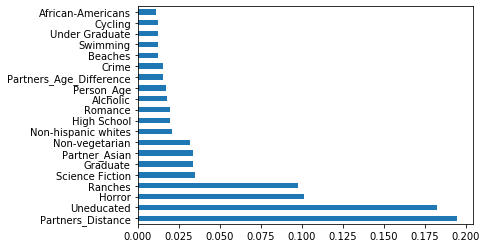

In [26]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_feature.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [27]:
# Checking the initial configuration, when no featuer selection is made.
# The result obtained from here, will be compared after feature selection.


In [28]:
from sklearn.model_selection import train_test_split


In [29]:
print('Before Starting the print::::::::::::::::::::::::::::::')
X_train, X_test, y_train, y_test = train_test_split(temp[['Person_Age','Partners_Age_Difference', 'Partners_Distance', 
'Female','Male', 'Transgender', 'Heterosexual', 'Homosexual', 'African-Americans', 'Asian', 'Hispanic and Latino',
 'Non-hispanic whites', 'Athletics', 'Cooking','Cycling','Gardening','Reading','Swimming', 'cooking',
 'Graduate', 'High School', 'Under Graduate', 'Uneducated', 'Beaches', 'Heritage', 'Mountains',
 'Ranches', 'Crime', 'Horror', 'Romance', 'Science Fiction', 'action', 'Non-vegetarian', 'Alcholic', 'Partner_Bisexual',
 'Partner_Heterosexual','Partner_African-Americans','Partner_Asian','Partner_Hispanic and Latino','Native Alakan','Partner_Non-hispanic whites']],temp.Compatibility,train_size=0.9)
print('After Starting the print::::::::::::::::::::::::::::::')


Before Starting the print::::::::::::::::::::::::::::::
After Starting the print::::::::::::::::::::::::::::::


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
print('Before fitting the model::::::::::::::::::::::::::::::')
model.fit(X_train.dropna(), y_train.dropna())
print('After fitting the model::::::::::::::::::::::::::::::')

Before fitting the model::::::::::::::::::::::::::::::
After fitting the model::::::::::::::::::::::::::::::


In [32]:
# Predicting the test result to be compared later and get the model score.
y_predicted = model.predict(X_test.dropna())
y_predicted

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
      dtype=int64)

In [33]:
model.score(X_test.dropna(),y_test.dropna())

1.0

In [34]:
model.predict_proba(X_test.dropna())

array([[2.57406056e-03, 9.97425939e-01],
       [7.00418907e-01, 2.99581093e-01],
       [9.90870174e-01, 9.12982600e-03],
       [8.50385420e-01, 1.49614580e-01],
       [5.27536081e-02, 9.47246392e-01],
       [7.56806906e-02, 9.24319309e-01],
       [3.02253819e-03, 9.96977462e-01],
       [1.73862223e-03, 9.98261378e-01],
       [3.43328086e-03, 9.96566719e-01],
       [1.74911129e-03, 9.98250889e-01],
       [3.34307548e-03, 9.96656925e-01],
       [5.44824905e-02, 9.45517509e-01],
       [6.52101775e-02, 9.34789823e-01],
       [4.12887981e-03, 9.95871120e-01],
       [3.02253819e-03, 9.96977462e-01],
       [2.06011035e-01, 7.93988965e-01],
       [6.52101775e-02, 9.34789823e-01],
       [6.10585349e-03, 9.93894147e-01],
       [9.96722190e-01, 3.27781020e-03],
       [1.12948916e-01, 8.87051084e-01],
       [5.01015462e-01, 4.98984538e-01],
       [7.56686906e-01, 2.43313094e-01],
       [9.97037928e-01, 2.96207210e-03],
       [9.98735160e-01, 1.26483954e-03],
       [7.568069

In [35]:
# Now, building a model based on the two feature selections as
# discussed above.

In [36]:
print('Before Starting the print::::::::::::::::::::::::::::::')
X_train, X_test, y_train, y_test = train_test_split(temp[['Partners_Distance', 'Uneducated', 'Horror', 'Ranches',
'High School', 'Science Fiction', 'African-Americans', 'African-Americans','Cycling','Asian', 'Asian',
'Non-vegetarian', 'Partners_Age_Difference', 'Beaches']], temp.Compatibility,train_size=0.9)
print('After Starting the print::::::::::::::::::::::::::::::')

Before Starting the print::::::::::::::::::::::::::::::
After Starting the print::::::::::::::::::::::::::::::


In [37]:
print('Before fitting the model::::::::::::::::::::::::::::::')
model.fit(X_train.dropna(), y_train.dropna())
print('After fitting the model::::::::::::::::::::::::::::::')


Before fitting the model::::::::::::::::::::::::::::::
After fitting the model::::::::::::::::::::::::::::::


In [38]:
# Predicting the test result to be compared later and get the model score.
y_predicted = model.predict(X_test.dropna())
y_predicted


array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [39]:
model.score(X_test.dropna(),y_test.dropna())


0.9727272727272728

In [40]:
model.predict_proba(X_test.dropna())

array([[2.13776182e-02, 9.78622382e-01],
       [2.93722585e-02, 9.70627741e-01],
       [9.38247269e-01, 6.17527313e-02],
       [9.75566082e-01, 2.44339185e-02],
       [5.07702606e-02, 9.49229739e-01],
       [1.82073285e-02, 9.81792672e-01],
       [9.95006208e-01, 4.99379198e-03],
       [2.64623301e-02, 9.73537670e-01],
       [9.59045783e-01, 4.09542172e-02],
       [9.46146293e-02, 9.05385371e-01],
       [2.67911636e-02, 9.73208836e-01],
       [9.92817091e-01, 7.18290891e-03],
       [6.12341951e-02, 9.38765805e-01],
       [1.27863257e-03, 9.98721367e-01],
       [5.69261325e-02, 9.43073868e-01],
       [5.31986111e-04, 9.99468014e-01],
       [1.54129498e-03, 9.98458705e-01],
       [4.86841140e-03, 9.95131589e-01],
       [6.86249979e-03, 9.93137500e-01],
       [9.88397150e-01, 1.16028498e-02],
       [5.69261325e-02, 9.43073868e-01],
       [9.92602258e-02, 9.00739774e-01],
       [2.13776182e-02, 9.78622382e-01],
       [9.95975551e-01, 4.02444870e-03],
       [5.319861